In [1]:
import numpy as np
import tensorflow as tf
import os
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split



2024-02-20 00:28:54.049096: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-20 00:28:54.304239: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 00:28:54.304304: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 00:28:54.352071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 00:28:54.439249: I tensorflow/core/platform/cpu_feature_guar

In [2]:
class_labels = os.listdir('chest_xray/train')
class_labels

['PNEUMONIA', 'NORMAL', '.DS_Store']

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.25)
training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale',
                                                 shuffle = True,
                                                 subset = 'training')
validation_set = train_datagen.flow_from_directory('chest_xray/train',
                                                   target_size = (256, 256),
                                                   batch_size = 16,
                                                   class_mode = 'binary',
                                                   color_mode = 'grayscale',
                                                   shuffle = False,
                                                   subset = 'validation')

Found 3925 images belonging to 2 classes.


Found 1307 images belonging to 2 classes.


In [4]:
type(training_set)

keras.src.preprocessing.image.DirectoryIterator

## VGG Arch

In [5]:



# Assuming your input shape is (height, width, channels)
input_shape = (256, 256,1)

# Define the VGG-16 model for binary classification
model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    # Conv2D(256, (3, 3), activation='relu', padding='same'),
    # Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Block 4
    #Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    #MaxPooling2D((2, 2)),

    # # Block 5
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # Conv2D(512, (3, 3), activation='relu', padding='same'),
    # MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification with sigmoid activation
])

# Compile the model with binary crossentropy loss and an appropriate optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


2024-02-20 00:28:58.050383: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-20 00:28:58.354706: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-20 00:28:58.354760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-20 00:28:58.359219: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-20 00:28:58.359284: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                   

In [6]:
with tf.device('/gpu:1'):
    model.fit(training_set,validation_data= validation_set ,epochs=10)

Epoch 1/10


2024-02-20 00:29:00.065540: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-20 00:29:00.347513: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-20 00:29:01.478223: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-20 00:29:01.796733: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1bb5911b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-20 00:29:01.796777: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-20 00:29:01.802185: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708369141.874012    3882 devic

246/246 [==============================] - 45s 140ms/step - loss: 0.3128 - accuracy: 0.8800 - val_loss: 0.1654 - val_accuracy: 0.9212
Epoch 2/10
246/246 [==============================] - 31s 125ms/step - loss: 0.1015 - accuracy: 0.9636 - val_loss: 0.0882 - val_accuracy: 0.9671
Epoch 3/10
246/246 [==============================] - 31s 126ms/step - loss: 0.0754 - accuracy: 0.9712 - val_loss: 0.2344 - val_accuracy: 0.9204
Epoch 4/10
246/246 [==============================] - 31s 126ms/step - loss: 0.0477 - accuracy: 0.9789 - val_loss: 0.1362 - val_accuracy: 0.9640
Epoch 5/10
246/246 [==============================] - 31s 126ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.1050 - val_accuracy: 0.9648
Epoch 6/10
246/246 [==============================] - 32s 129ms/step - loss: 0.0436 - accuracy: 0.9819 - val_loss: 0.5159 - val_accuracy: 0.9128
Epoch 7/10
246/246 [==============================] - 32s 131ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.1519 - val_accuracy: 0.9

In [7]:
y_pred = model.predict(validation_set)
y_pred

82/82 [==============================] - 5s 57ms/step


array([[0.00141542],
       [0.058504  ],
       [0.07587095],
       ...,
       [0.9999932 ],
       [0.9911924 ],
       [0.99998903]], dtype=float32)

In [8]:
y_pred_new = 1*(y_pred > 0.5)
y_pred_new

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [9]:
import cv2
import os

# Define the folder path and the desired size
folder = "/home/sagnik/ML_Folder/Pneumonia classification/Dataset/chest_xray/train/PNEUMONIA"
size = (256, 256)

# Loop over the files in the folder
for filename in os.listdir(folder):
  # Check if the file is an image
  if filename.endswith(".jpg") or filename.endswith(".png"):
    # Load the image as a numpy array
    img = cv2.imread(os.path.join(folder, filename))
    # Resize the image to the desired size
    img = cv2.resize(img, size)
    # Convert the image to RGB color mode
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Save the image with the same name
    cv2.imwrite(os.path.join(folder, filename), img)


<class 'numpy.ndarray'>
(936, 1352)


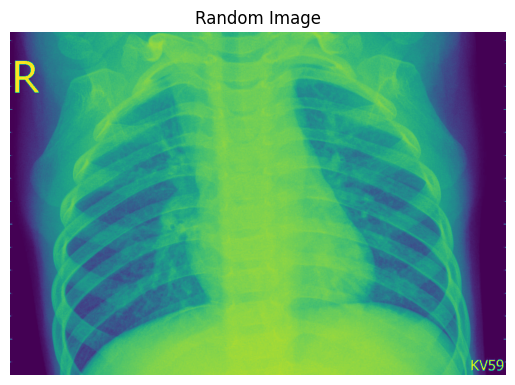

In [10]:
import matplotlib.pyplot as plt
import random
import cv2
# Specify the path to your image folder
image_folder = "/home/sagnik/ML_Folder/Pneumonia classification/Dataset/chest_xray/train/PNEUMONIA"

# Create an empty list to store the images
images = []

# Loop through the files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".png", ".jpeg", ".bmp")):
        # Check if the file is an image (you can add more file extensions if needed)
        image_path = os.path.join(image_folder, filename)
        
        with Image.open(image_path) as img:
            
            img_array = np.array(img)
            images.append(img_array)

# Now, 'images' contains all the images from the folder



# Check if there are any images in the list
if not images:
    print("No image files found in the folder.")
else:
    # Select a random image from the list
    random_image =  random.choice(images) #images[10]
    #print(model.predict(random_image))
    print(type(random_image))
    print(random_image.shape)
    
    # Open and display the random image
    plt.imshow(random_image)
    plt.title('Random Image')
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

# assuming x is your input data with shape (32, 256, 3)
#random_image = random_image.reshape(-1, 256, 256, 3) # -1 means infer the batch size automatically
# now x has the shape (32, 256, 256, 3) and can be passed to the model


In [11]:
y_test_set = np.concatenate([validation_set.next()[1] for i in range(validation_set.__len__())])
y_test_set = y_test_set.astype(int)
y_test_set = y_test_set.reshape(len(y_test_set), 1)
print(y_test_set)

In [13]:
y_pred = model.predict(validation_set)
y_pred = (y_pred > 0.5)

82/82 [==============================] - 5s 57ms/step


In [14]:
y_pred_round = y_pred.astype(int)
print(y_pred_round)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [15]:
print(np.concatenate((y_pred_round.reshape(len(y_pred_round), 1), y_test_set.reshape(len(y_test_set), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_set, y_pred_new)
print(cm)
accuracy_score(y_test_set, y_pred_new)

[[315  22]
 [ 31 939]]


0.9594491201224178

: 